<a href="https://colab.research.google.com/github/kperes/Colab_Weather_Prediction/blob/main/Weather_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/kperes/Colab_Weather_Prediction/main/seattle-weather.csv")

In [2]:
data.shape

(1461, 6)

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


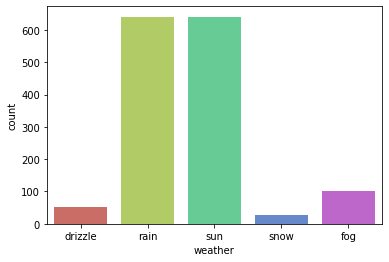

In [4]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="hls")

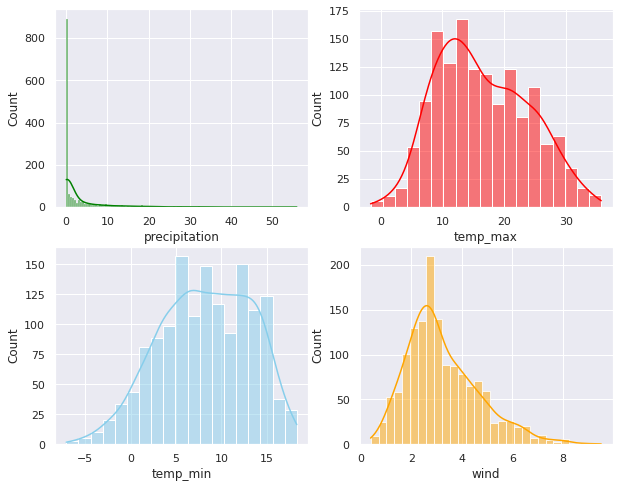

In [5]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [6]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df=data.drop(["date"],axis=1)

In [8]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [10]:
import numpy as np
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

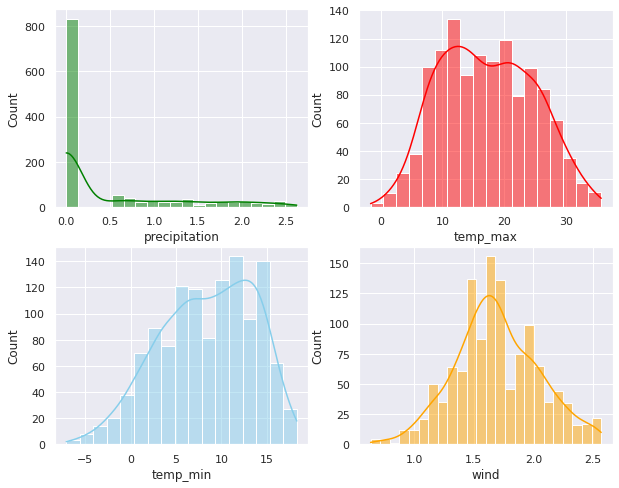

In [11]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [12]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [13]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [14]:
df.weather.unique()

array([0, 2, 4, 3, 1])

**TREINAMENTO DE ALGORITMOS E MODELO**

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=2)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

**K-NEAREST NEIGHBOR CLASSIFIER (KNN):**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.18      0.22        11
           2       0.70      0.79      0.74        33
           3       1.00      0.33      0.50         3
           4       0.83      0.84      0.84        76

    accuracy                           0.75       124
   macro avg       0.56      0.43      0.46       124
weighted avg       0.75      0.75      0.74       124



**SUPPORT VECTOR MACHINE (SVM):**

In [18]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
confusion_matrix(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.71      0.76      0.74        33
           3       0.00      0.00      0.00         3
           4       0.80      0.93      0.86        76

    accuracy                           0.77       124
   macro avg       0.30      0.34      0.32       124
weighted avg       0.68      0.77      0.72       124



**GRADIENT BOOSTING MACHINE (GBM):**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier as GBM
gbc=GBM(subsample=0.5, n_estimators=450, max_depth=5, max_leaf_nodes=25)
gbc.fit(x_train,y_train)
y_pred_gbc = gbc.predict(x_test)
confusion_matrix(y_test, y_pred_gbc)
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.36      0.47        11
           2       0.88      0.85      0.86        33
           3       0.67      0.67      0.67         3
           4       0.84      0.91      0.87        76

    accuracy                           0.83       124
   macro avg       0.61      0.56      0.57       124
weighted avg       0.82      0.83      0.82       124



**EXTREME GRADIENT BOOSTING (XGB):**

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier as XGB
xgb = XGB(booster='gbtree', objective='multi:softprob', max_depth=6, learning_rate=0.1, n_estimators=200, random_state=2, n_jobs=-1, subsample = 1) 
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
confusion_matrix(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.09      0.17        11
           2       0.84      0.82      0.83        33
           3       0.75      1.00      0.86         3
           4       0.84      0.96      0.90        76

    accuracy                           0.84       124
   macro avg       0.69      0.57      0.55       124
weighted avg       0.85      0.84      0.81       124



In [21]:
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))
print("GBC Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

KNN Accuracy:75.00%
SVM Accuracy:77.42%
GBC Accuracy:83.06%
XGB Accuracy:83.87%
